## Author: Kazi Amit Hasan
## Roll: 1503089

### Algorithm:
1. Assign connection weights
2. Initialize the unknown pattern
3. Iterate until convergence

In [2]:
import numpy as np

In [3]:
nb_patterns = 4
pattern_width = 5
pattern_height = 9

In [4]:
X = np.zeros((nb_patterns, pattern_width * pattern_height))

#Number 1
X[0] = [
    -1, -1,  1,  1, -1,
    -1,  1,  1,  1, -1,
    -1, -1,  1,  1, -1,
    -1, -1,  1,  1, -1,
    -1, -1,  1,  1, -1,
    -1, -1,  1,  1, -1,
    -1, -1,  1,  1, -1,
    -1, -1,  1,  1, -1,
    -1, -1,  1,  1, -1
]

#Number 2
X[1] = [
     1,  1,  1,  1,  1,
     1,  1,  1,  1,  1,
    -1, -1, -1,  1,  1,
    -1, -1, -1,  1,  1,
     1,  1,  1,  1,  1,
     1,  1, -1, -1, -1,
     1,  1, -1, -1, -1,
     1,  1,  1,  1,  1,
     1,  1,  1,  1,  1
]

#Number 3
X[2] = [
     1,  1,  1,  1,  1,
     1,  1,  1,  1,  1,
    -1, -1, -1,  1,  1,
    -1, -1, -1,  1,  1,
     1,  1,  1,  1,  1,
    -1, -1, -1,  1,  1,
    -1, -1, -1,  1,  1,
     1,  1,  1,  1,  1,
     1,  1,  1,  1,  1
]

#Number 4
X[3] = [
     1,  1, -1,  1,  1,
     1,  1, -1,  1,  1,
     1,  1, -1,  1,  1,
     1,  1,  1,  1,  1,
     1,  1,  1,  1,  1,
    -1, -1, -1,  1,  1,
    -1, -1, -1,  1,  1,
    -1, -1, -1,  1,  1,
    -1, -1, -1,  1,  1
]

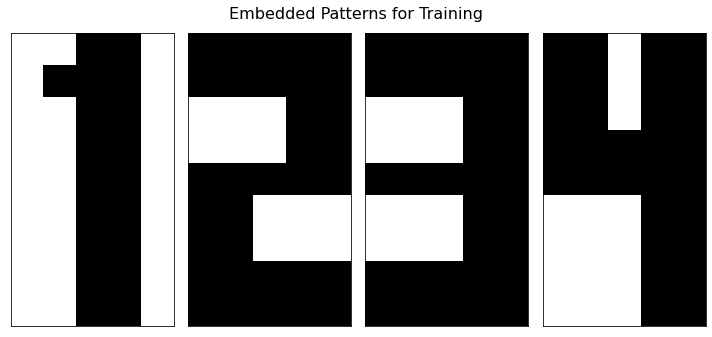

In [15]:
import matplotlib.pyplot as plt
def plot(X):
    fig, ax = plt.subplots(1, nb_patterns, figsize=(10, 5))

    fig.suptitle('Embedded Patterns for Training', fontsize=16)

    for i in range(nb_patterns):
        ax[i].matshow(X[i].reshape((pattern_height, pattern_width)), cmap='binary')
        ax[i].set_xticks([])
        ax[i].set_yticks([])

    fig.tight_layout()
    plt.show()
plot(X)

In [6]:
def training(X):                
    return np.dot(X.T,X)/len(X[0]) -(np.identity(pattern_width*pattern_height)*(len(X)/len(X[0])))
        

In [7]:
W=training(X)

W

array([[0.        , 0.08888889, 0.        , ..., 0.        , 0.04444444,
        0.08888889],
       [0.08888889, 0.        , 0.        , ..., 0.        , 0.04444444,
        0.08888889],
       [0.        , 0.        , 0.        , ..., 0.08888889, 0.04444444,
        0.        ],
       ...,
       [0.        , 0.        , 0.08888889, ..., 0.        , 0.04444444,
        0.        ],
       [0.04444444, 0.04444444, 0.04444444, ..., 0.04444444, 0.        ,
        0.04444444],
       [0.08888889, 0.08888889, 0.        , ..., 0.        , 0.04444444,
        0.        ]])

In [8]:
def genNoise(num, porc):
    
    vet = np.copy(num)
    size = len(vet)
    qtdPixels = int((size * porc) / 100)
    pixelsToModify = random.sample(range(size), qtdPixels)
    for i in range(qtdPixels):
        p = pixelsToModify[i]
        vet[p] = -1 if vet[p] == 1 else 1
            
    return vet

In [9]:
def activation(X,w):
    u = X.copy()
    for i in range(len(u)):
         if (np.dot(X,w[i])>0):
                u[i]=1
         else:
                u[i]= -1
    return u

In [10]:
def predict(X,w):
    vCurr=X.copy()
    epoch=0
    vPrev=0
    while(np.array_equal(vCurr,vPrev)==False):
        print(epoch+1)
        epoch+=1
        vPrev=vCurr.copy() 
        vCurr=activation(X,w)
        
    return vCurr
        

In [11]:
def showPatterns(titlePattern, patternOriginal, patternCorrupted, patternRecovered):
    
    fig, ax = plt.subplots(1, 3, figsize=(10, 5))
    
    fig.suptitle(titlePattern, fontsize=16)

    ax[0].matshow(patternOriginal.reshape(pattern_height, pattern_width), cmap='binary')
    ax[0].set_title('Transmitted Image \n (no noise)')
    ax[0].set_xticks([])
    ax[0].set_yticks([])
    
    ax[1].matshow(patternCorrupted.reshape(pattern_height, pattern_width), cmap='binary')
    ax[1].set_title('Image Received \n (with noises)')
    ax[1].set_xticks([])
    ax[1].set_yticks([])

    ax[2].matshow(patternRecovered.reshape(pattern_height, pattern_width), cmap='binary')
    ax[2].set_title('Recovered Image \n (no noise)')
    ax[2].set_xticks([])
    ax[2].set_yticks([])
    
    fig.tight_layout()
    fig.subplots_adjust(top=0.75)
    
    plt.show()

In [12]:
def test(titlePattern, pattern, noiseProc):    
    original = pattern.copy()    
    noise = genNoise(original, noiseProc)    
    recovered = predict(noise,W)    
    showPatterns(titlePattern, original, noise, recovered)

**Testes with 20%**


1
2


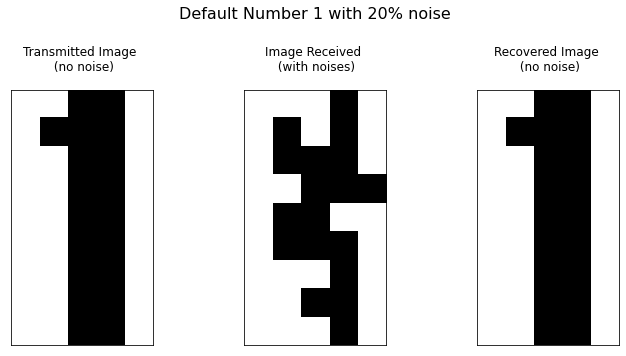

1
2


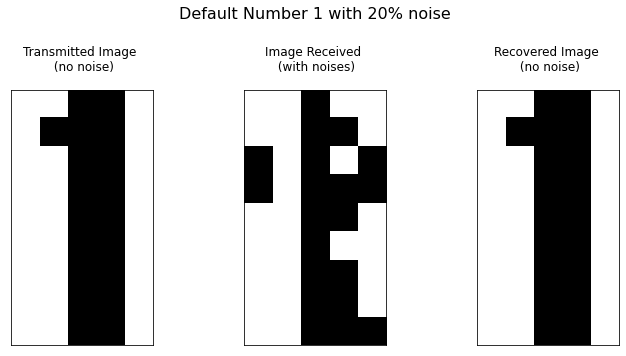

1
2


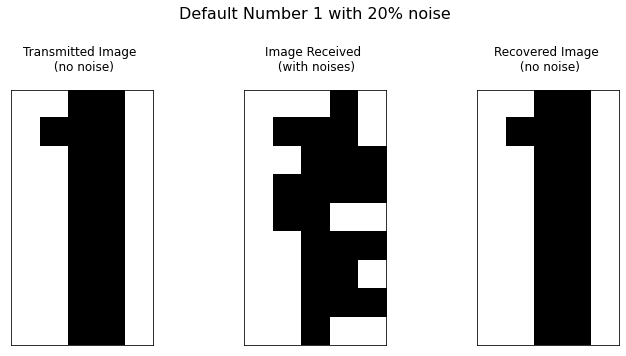

1
2


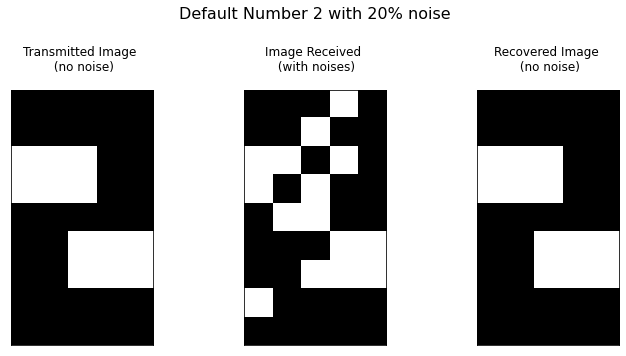

1
2


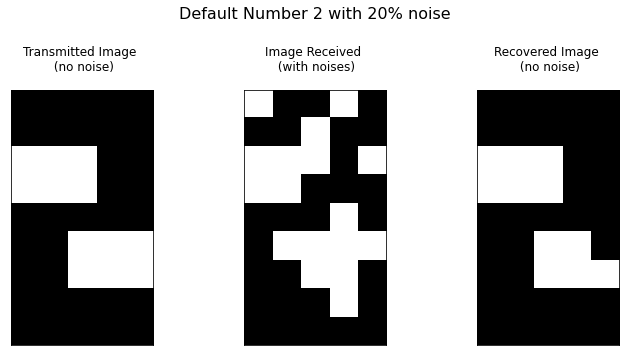

1
2


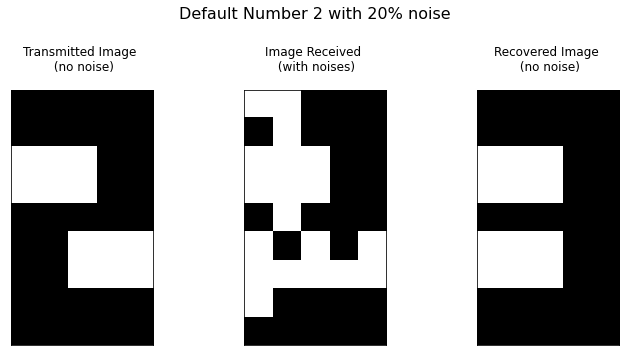

1
2


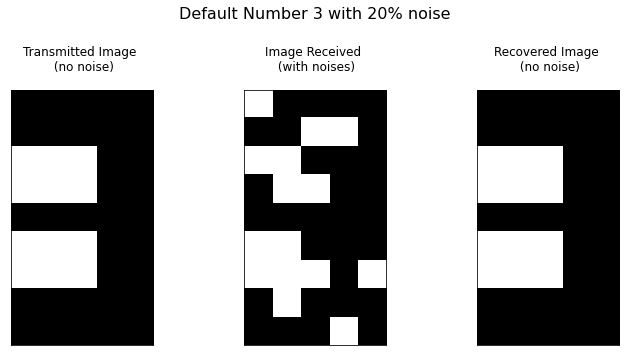

1
2


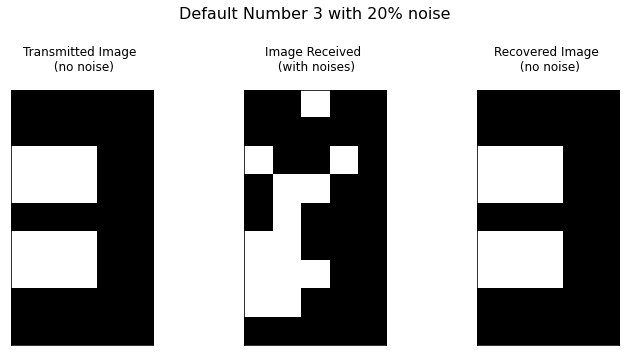

1
2


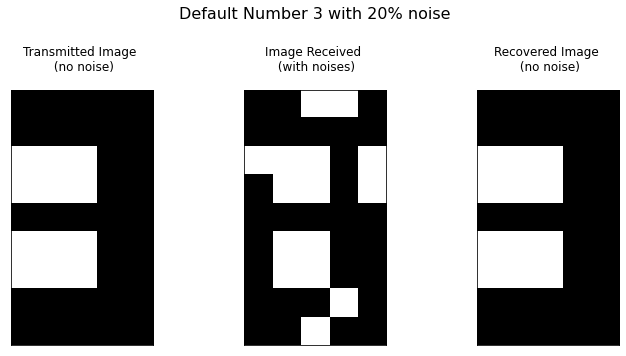

1
2


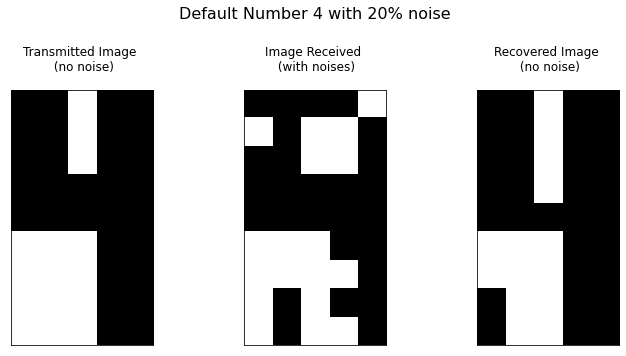

1
2


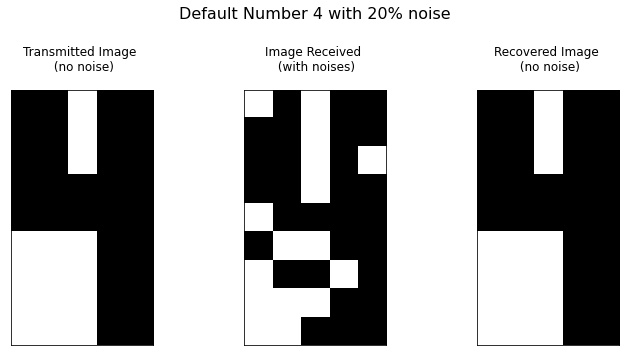

1
2


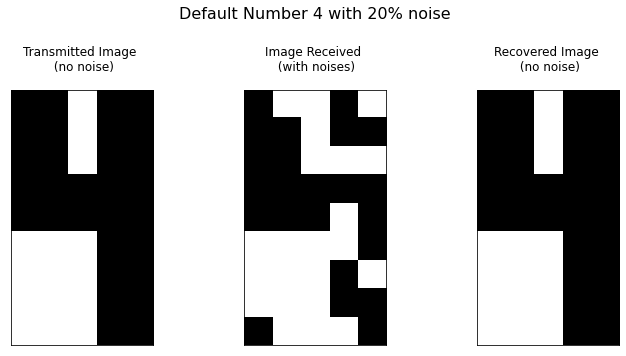

In [13]:
import random
for i in range(4):
    for j in range(3):
        test('Default Number {} with 20% noise'.format(i+1), X[i], 20)

> **others %**


1
2


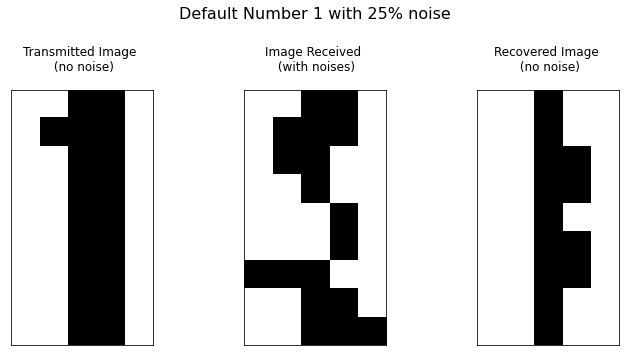

1
2


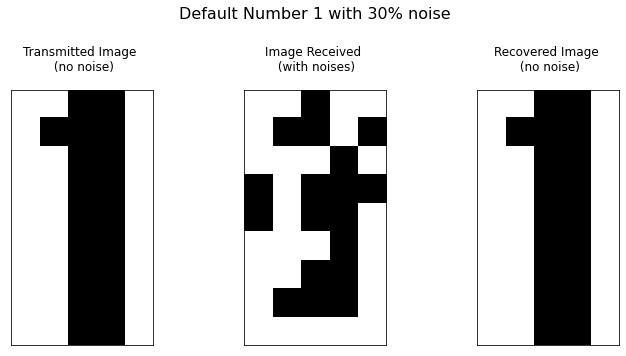

1
2


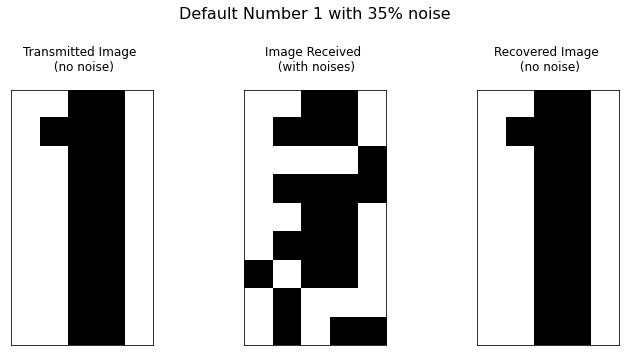

1
2


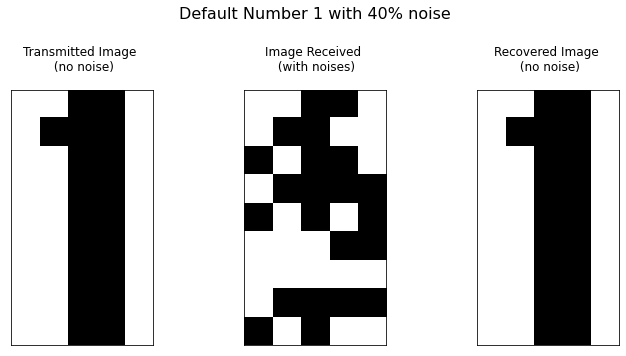

1
2


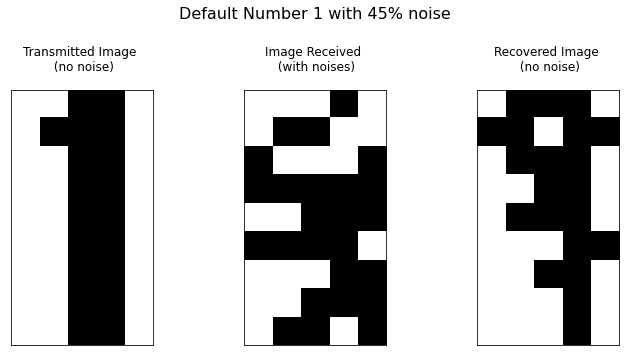

1
2


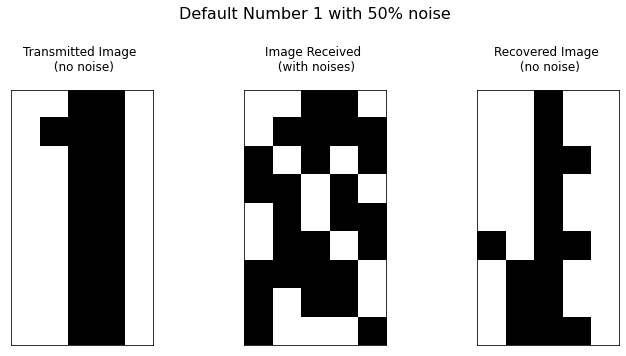

1
2


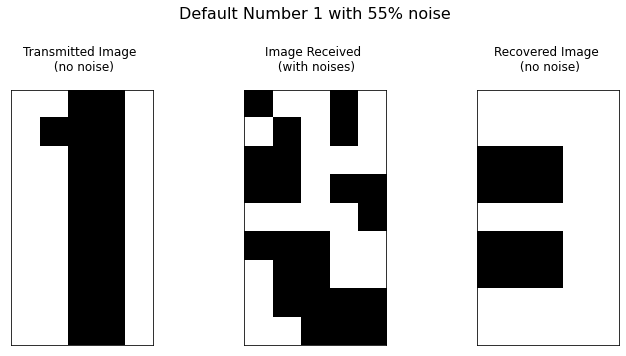

1
2


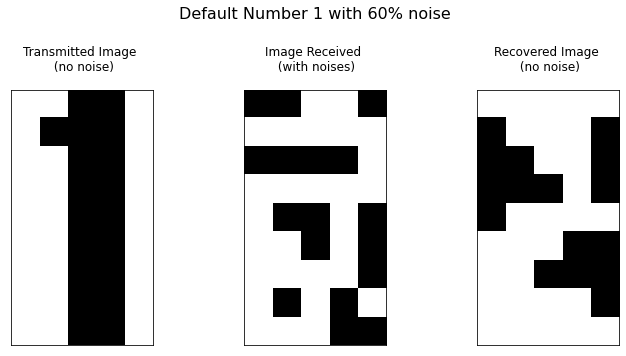

1
2


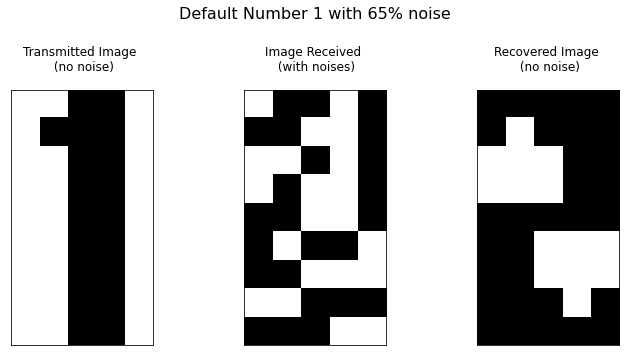

1
2


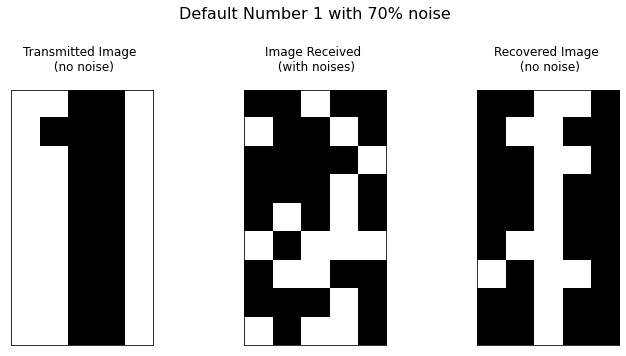

1
2


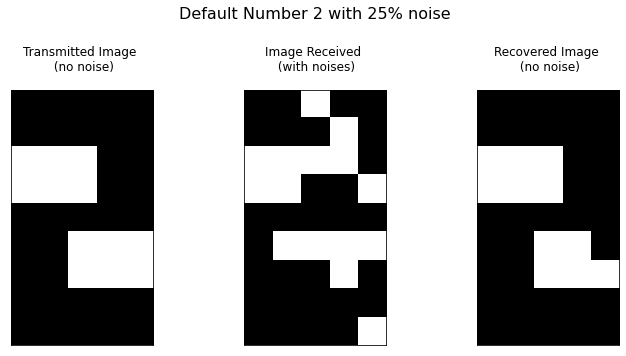

1
2


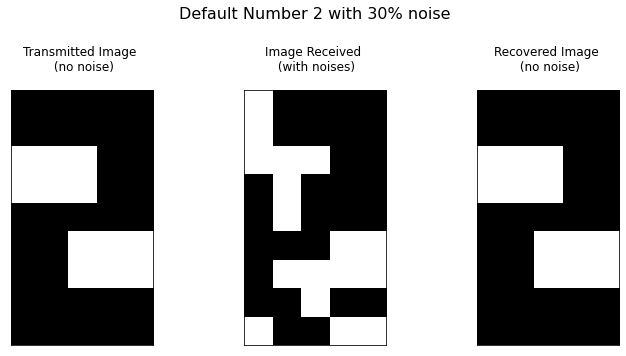

1
2


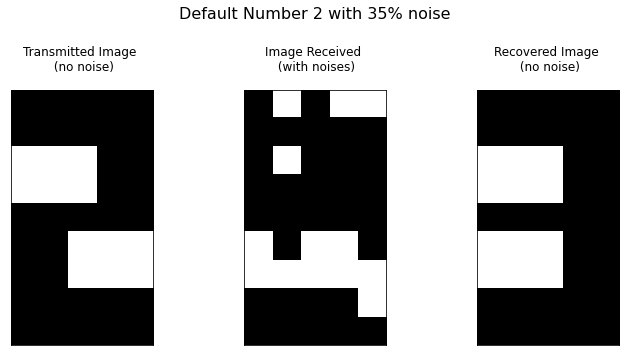

1
2


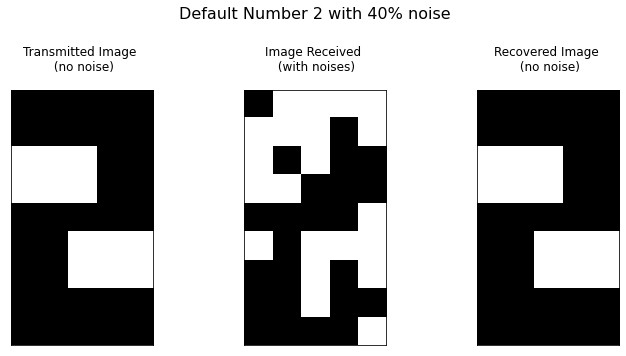

1
2


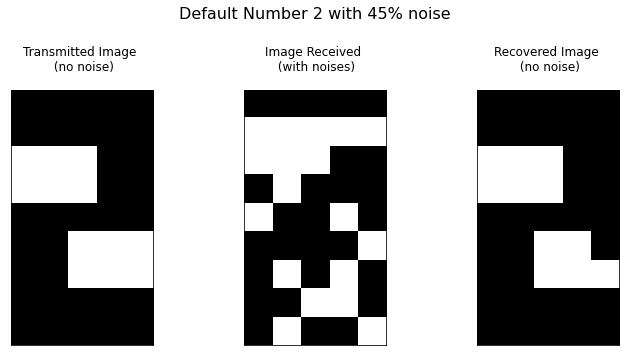

1
2


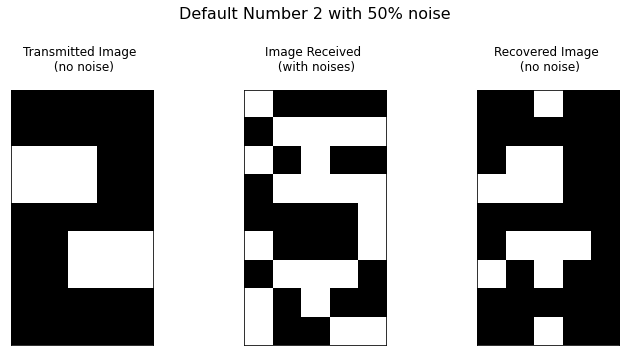

1
2


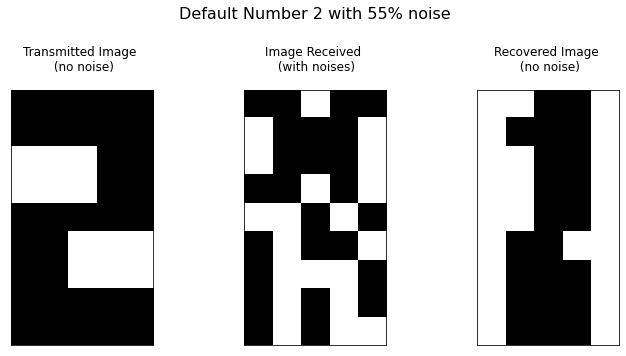

1
2


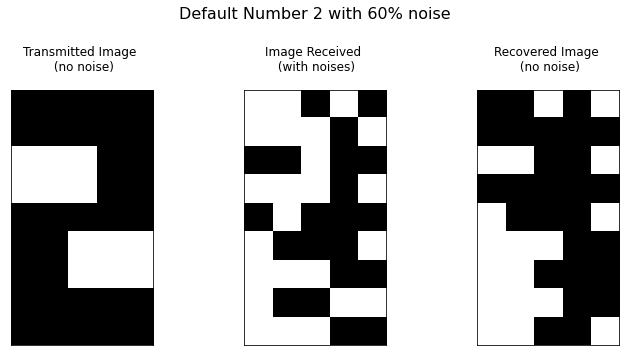

1
2


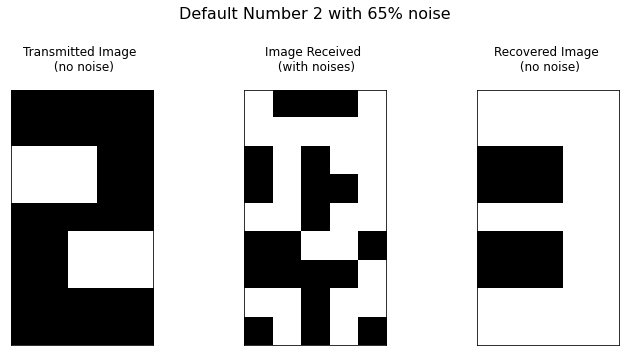

1
2


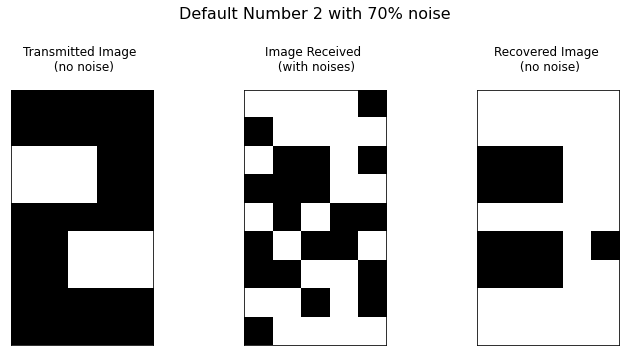

1
2


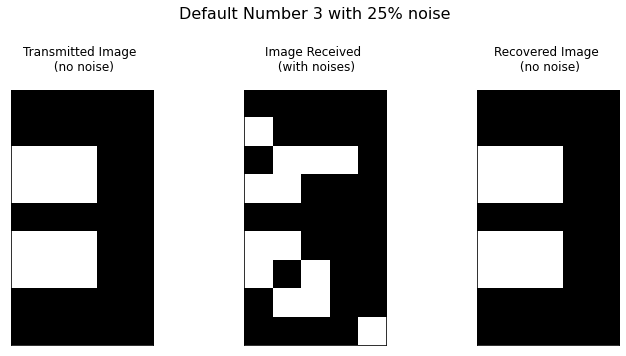

1
2


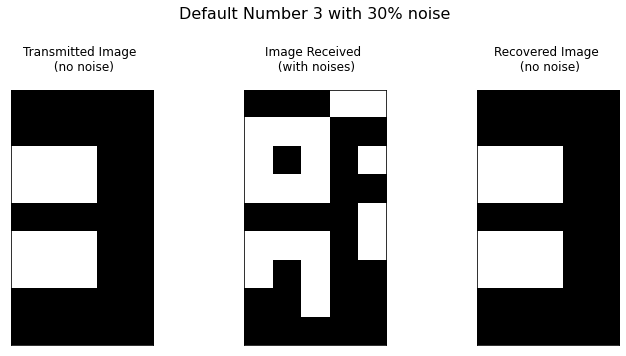

1
2


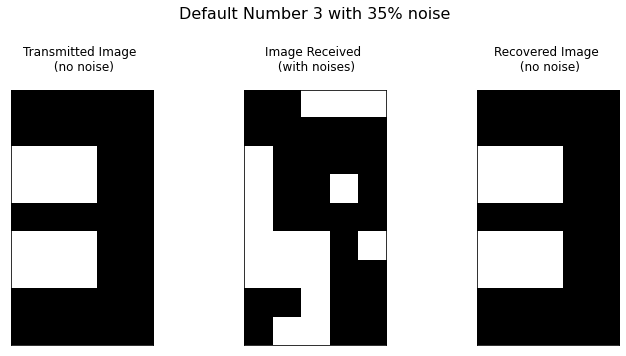

1
2


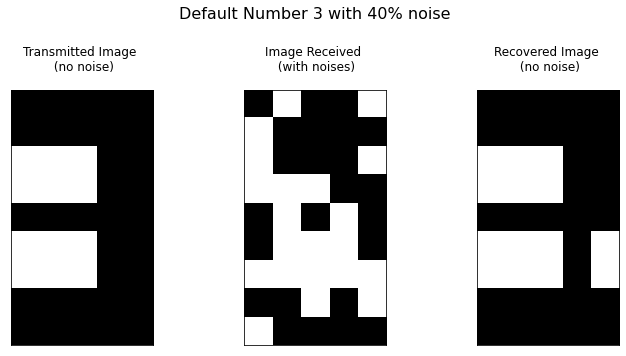

1
2


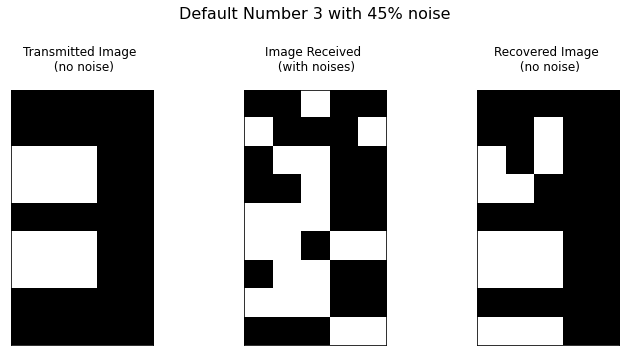

1
2


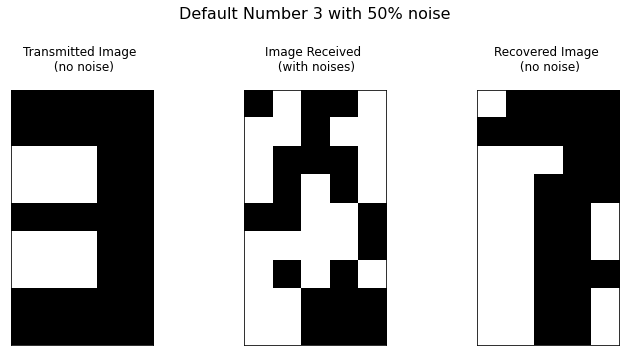

1
2


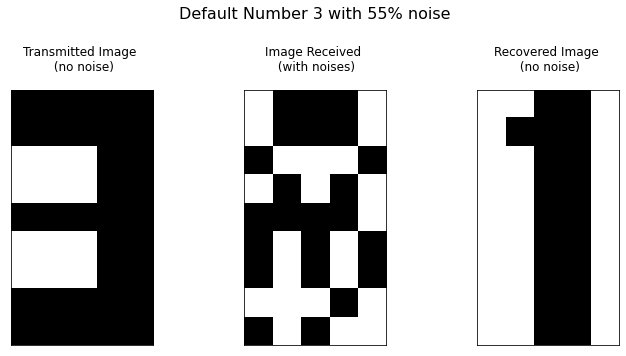

1
2


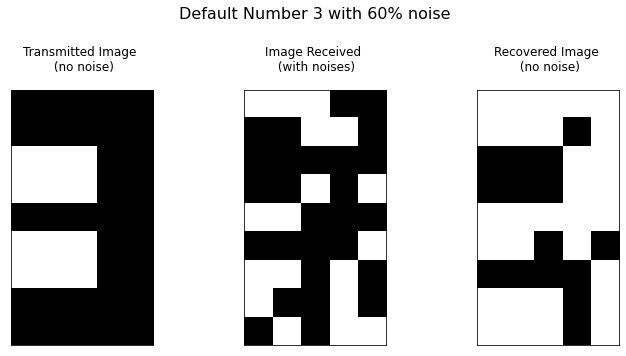

1
2


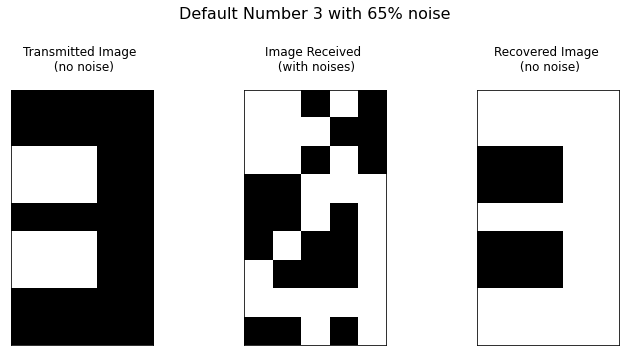

1
2


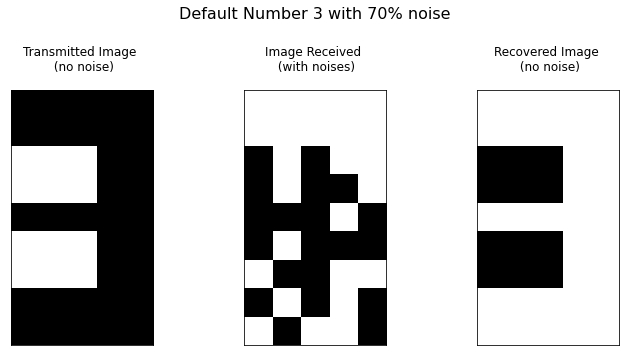

1
2


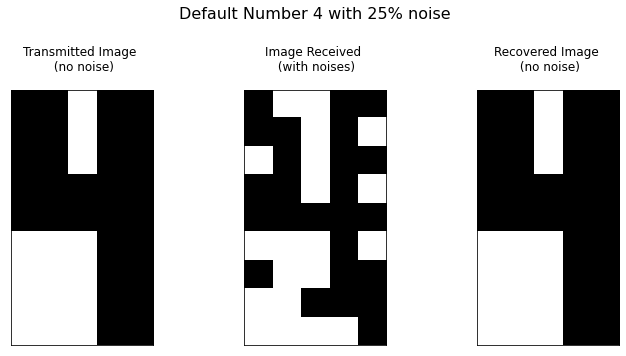

1
2


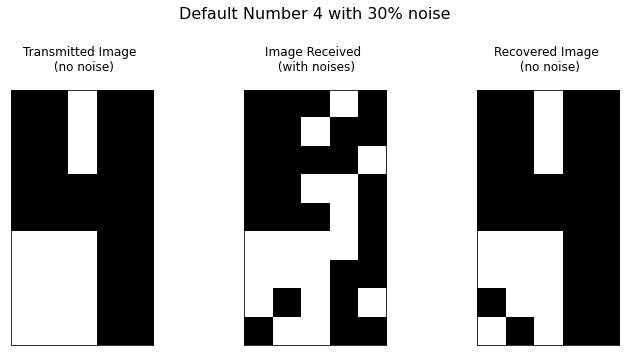

1
2


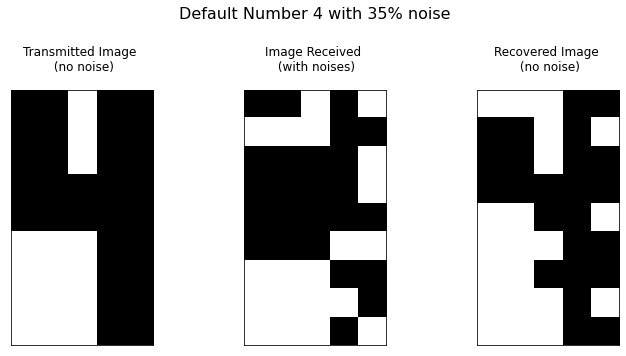

1
2


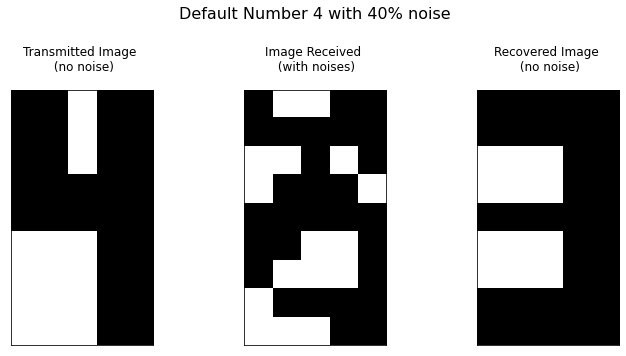

1
2


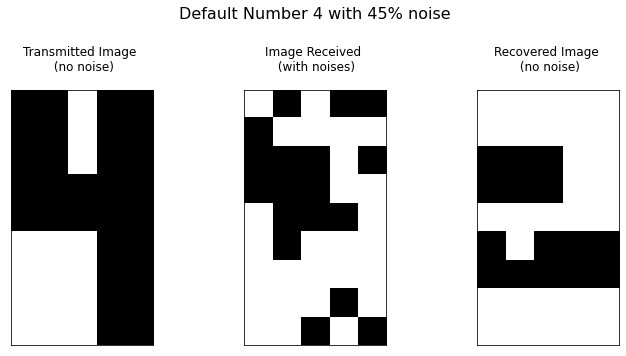

1
2


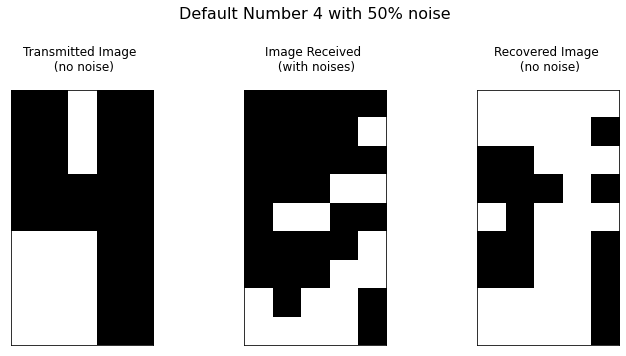

1
2


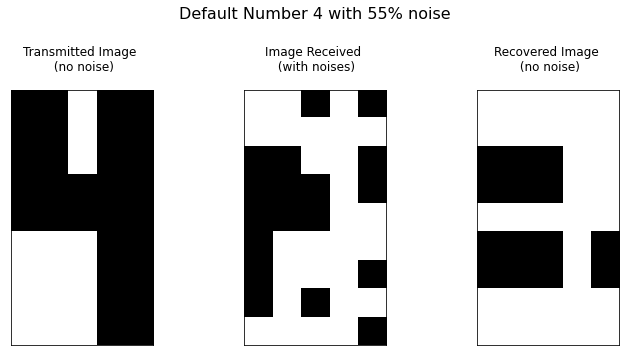

1
2


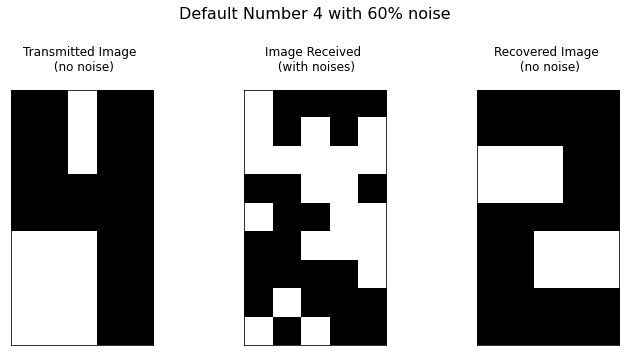

1
2


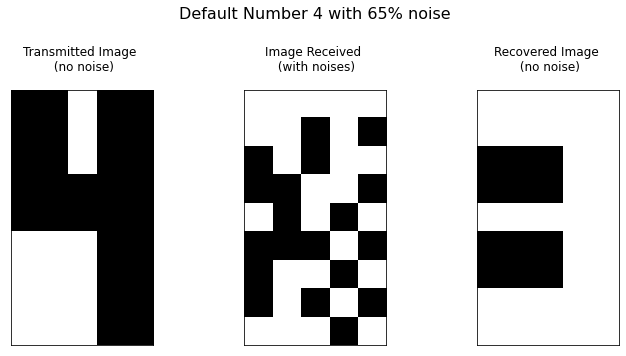

1
2


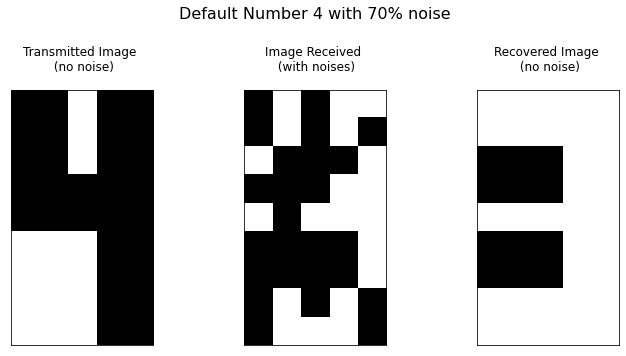

In [14]:
for i in range(4):
    p=20
    for j in range(10):
        test('Default Number {} with {}% noise'.format(i+1,p+5), X[i], p)
        p+=5

****
By increasing the noise percentage, the network has more difficulties to recover the standard initially provided to it**